### Ch 3: A Tour of ML Classifiers Using Scikit Learn

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets

### First Steps w/ Scikit Learning -- Training a Perceptron

##### Load Data

In [2]:
### in sklearn package 'datasets' there's a preset dataset that can be called using 'load_iris()'
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# data is in a dictionary with the key 'data'
iris['data'][:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
# So can all call dictionary key by using .key
# 'X' contains the petal length and petal width --> not sure which column corresponds to which yet
X = iris.data[:, [2, 3]]

In [6]:
X[0:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [7]:
# 'y' contains the correct flower species (options are 0, 1, 2)
# storing class labels as integers is good practice to keep it simple
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


##### Split Data into Test Set and Train Set

In [10]:
# Separate data into training set and test set
# The 'random_state' parameter shuffles the dataset so that there is a random amount in each train/test set
# the 'stratify' parameter splits the datasets so that each train/test set has a proportional amount of each 'y'
#... as represented in the original dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
# showcasing what the 'stratify' parameter is doing
print('Label counts in "y":', np.bincount(y))
print('Label counts in "y_train":', np.bincount(y_train))
print('Label counts in "y_test":', np.bincount(y_test))

Label counts in "y": [50 50 50]
Label counts in "y_train": [35 35 35]
Label counts in "y_test": [15 15 15]


##### Standardized Feature Scaling

In [12]:
# Feature scaling can help ML aglorithms perform optimally
# Use sklearn's 'StandardScaler' to standardize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Use the fit method to estimate the mean and stdev
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# !!! used the same mean/stdev the fit method derived from the training set, to standardize the test set
#... we do this so that both values from either set are comparable to one another
X_test_std = sc.transform(X_test)

In [13]:
X_train[:10]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3]])

In [14]:
# Features are standardized to be centered around 0
X_train_std[:10]

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ]])

##### Train on Standardized Training Set

In [15]:
# Data in standardized so can now train a perceptron model
# Most algorithms in sklearn already support multiclass classification by default via the OvR method
#... allows us to feed in 3 types of flowers all at once in the data

from sklearn.linear_model import Perceptron

# Used the 'random_state' parameter to insure the reproducability of the random shuffling of the training dataset
#... after each epoch

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

##### Use Trained Model to Predict

In [16]:
# Model is trained now time to predict
y_pred = ppn.predict(X_test_std)

# %d is used as a placeholder to specify a #, decimal, integer
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [17]:
percent_misclass = ((y_test != y_pred).sum() / len(y_test))
# format float as a string that resembles a percentage
percent_misclass = "{:.2%}".format(percent_misclass)
percent_misclass

'2.22%'

In [18]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# can also view performance using...
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


^^^ the difference between the 2 scoring metrics defined here:
- https://stackoverflow.com/questions/40726899/difference-between-score-and-accuracy-score-in-sklearn#:~:text=In%20the%20case%20of%20GaussianNB,number%20of%20correctly%20classified%20samples.

##### Plot Decision Regions

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [20]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # min and max of the first column of features-->petal length/width
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # min and max of the 2nd column of features --> petal length/width
    # Create a list range from the min to the max in increments of the resolution
    # meshgrid acts similiarly to a CROSS JOIN in SQL, creating the cartesian product
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
# ??? need to better understand this
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx], 
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0, c='none', marker='o', label='Test set', edgecolor='black', linewidth=1, s=100)

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

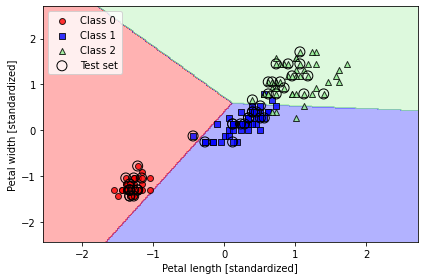

In [22]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###### Experminenting with how the plot_decision_regions function works

In [23]:
# plot decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # min and max of the first column of features-->petal length/width
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # min and max of the 2nd column of features --> petal length/width

In [24]:
print(f'x1_min: {x1_min}')
print(f'x1_max: {x1_max}')
print(f'x2_min: {x2_min}')
print(f'x2_max: {x2_max}')

x1_min: 0.0
x1_max: 7.9
x2_min: -0.9
x2_max: 3.5


In [25]:
x1_range = np.arange(x1_min, x1_max, 0.05)
x2_range = np.arange(x2_min, x2_max, 0.05)
print(x1_range)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55
 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2  6.25
 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65 6.7  6.75 6.8  6.85 6.9  6.95
 7.   7.05 7.1  7.15 7.2  7.25 7.3  7.35 7.4  7.45 7.5  7.55 7.6  7.65
 7.7  7.75 7.8  7.85]


In [26]:
xx1, xx2 = np.meshgrid(x1_range, x2_range)
np.meshgrid(x1_range, x2_range)

[array([[0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
        [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
        [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
        ...,
        [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
        [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
        [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85]]),
 array([[-0.9 , -0.9 , -0.9 , ..., -0.9 , -0.9 , -0.9 ],
        [-0.85, -0.85, -0.85, ..., -0.85, -0.85, -0.85],
        [-0.8 , -0.8 , -0.8 , ..., -0.8 , -0.8 , -0.8 ],
        ...,
        [ 3.35,  3.35,  3.35, ...,  3.35,  3.35,  3.35],
        [ 3.4 ,  3.4 ,  3.4 , ...,  3.4 ,  3.4 ,  3.4 ],
        [ 3.45,  3.45,  3.45, ...,  3.45,  3.45,  3.45]])]

In [27]:
xx1

array([[0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
       [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
       [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
       ...,
       [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
       [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85],
       [0.  , 0.05, 0.1 , ..., 7.75, 7.8 , 7.85]])

In [28]:
# The multiple lists were flattened into one
print(xx1.ravel()[:30])
# Can see the next list begins to start
print(xx1.ravel()[300:350])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45]
[7.1  7.15 7.2  7.25 7.3  7.35 7.4  7.45 7.5  7.55 7.6  7.65 7.7  7.75
 7.8  7.85 0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25
 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65]


###### Done Experminenting with how the plot_decision_regions function works

### Modeling Class Probabilities via Logistic Regression

In [29]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

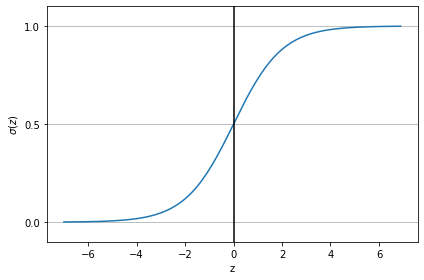

In [30]:
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$') # converts sigma to the symbol
plt.yticks([0.0, 0.5, 1.0]) # y-axis ticks and gridline
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### Learning the Model Weights via the Logistic Regression

In [31]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1-sigmoid(z))

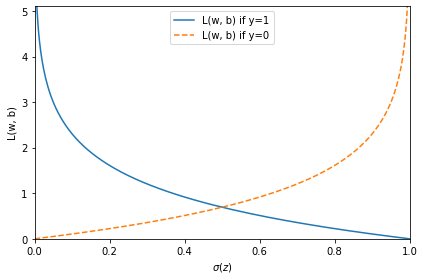

In [32]:
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
#plt.xlim([0, 1])
plt.xlim(0, 1)
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

^^^
- Main point, is that will penalize wrong prediction with an increasingly larger adjustment

### Converting an Adaline Implementation into an Algorithm for Logistic Regression

- Are going to using the full-bath gradient descent algorithm from earlier in the book but could have also used the stochastic gradient descent

In [33]:
class LogisticRegressionGD:
    """Gradient descent based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        # Initializes weight vector to be the length of the total # of columns of the X matrix
        # scale = standard deviation; loc = mean
        # --> generating random normal distribution of weights with stdev of .01 and mean of 0
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # Initializes bias to 0
        self.b_ = np.float_(0.)
        
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            # instead of updating weights after each training example (as in perceptron), do a batch update
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [34]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [35]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

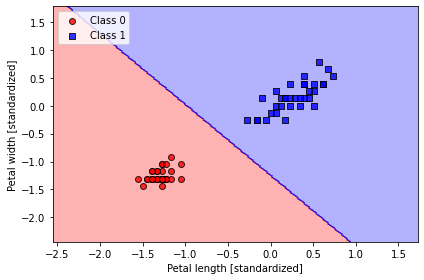

In [36]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Training a Logistic Regression Model with Scikit-learn

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr')

- Scikit-learn LogisticRegression doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Explanation of 'solver' parameter: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions
- Explanation of 'C' parameter which deals with regularization:
    - https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul
    - https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression


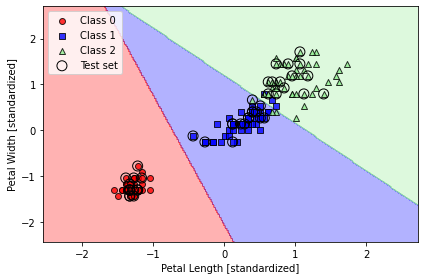

In [39]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Tackling Overfitting via Regularization

- Regularization is the process of calibrating your model to prevent over/underfitting
- Two common methods of regularization are the ridge and lasso method:
    - both multiply a variable "lambda" by the error formula --> the "lambda" is an adjustable multiple that you set for the penalty for errors
        - can increase/decrease to adjust how you want to penalize the errors
    - the ridge method uses the squared sum of the coefficient errors
    - the lasso method uses the absolute value sum of the coefficient errors
        - With that being said if you consider the difference between 5 and 10 when both are squared vs absolute value... the ridge method will magnify (have a higher penalty) for larger errors when compared to the lasso method
    - https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#what_is_regularization_in_machine_learning

In [40]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

- ^^^ executed 10 logisitic regression models with different values for the inverse-regularization parameter "C".
    - only collected the weight coefficients for class 1 (for illustration purposes)

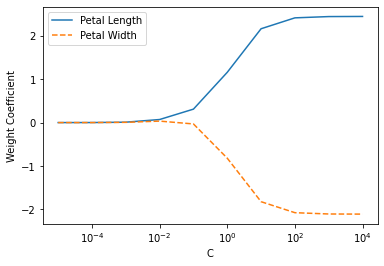

In [41]:
plt.plot(params, weights[:, 0], label='Petal Length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal Width')
plt.ylabel('Weight Coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

- ^^^ The weight coefficients shrink if the decrease the parameter "C", that is if we increase the regularization strength

###### Train an SVM Model to Classify Different Flowers

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

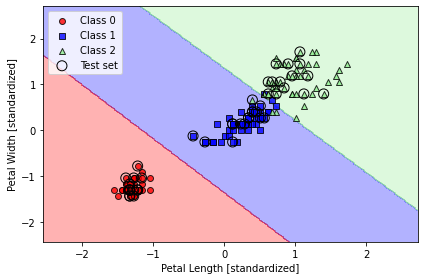

In [44]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

^^^ compare this to the chart for the standard logistic regression.
- Notice how the decision regions are linear lines --> the SVM is set to be linear
- In practical classification tasks, logistic regression and linear SVMs typically have similar results
    - Logistic regression tries to maximize conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are clsoest to the decision boundary (support vectors)
    - However, logistic regression tends to be simpler

###### Alternative Implementations in Scikit-learn

- scikit-learn's LogisticRegression class can make use of the LIBLINEAR library by setting solver='liblinear'
    - this library is a highly optimized C/C++ library --> faster than the standard
    - The SVC class also has a library called LIBSVM
- sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations vs SGDClassifier class

In [45]:
# Initialize the SGD version of the perceptron, logistic regression, and SVM
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Kernel Methods for Linearly Inseparable Data

- Will first create some synthetic data that has the form of an XOR gate
- Difference between OR and XOR: https://stackoverflow.com/questions/17659795/difference-between-or-and-xor
    - Example:
        - OR & XOR = TRUE --> A = TRUE, B = FALSE
        - OR = TRUE --> A = TRUE, B = TRUE
        - XOR = FALSE --> A = TRUE, B = TRUE

In [46]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

In [47]:
X_xor = np.random.randn(200, 2) # 200 random arrays, 2 numbers in each array
                                # based on a univariate Gaussian distribution where mean=0 and variance=1
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # XOR(1st column > 0, 2nd column > 0)
y_xor = np.where(y_xor, 1, 0) # converts the TRUE/FALSE from above into 0/1

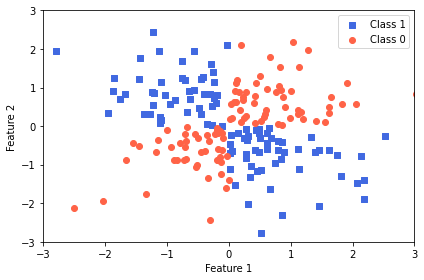

In [48]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
           c='royalblue', marker='s', label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
           c='tomato', marker='o', label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

###### Playing around with the above code

In [49]:
sum(y_xor)

100

In [50]:
X_xor[:10,0]

array([ 1.62434536, -0.52817175,  0.86540763,  1.74481176,  0.3190391 ,
        1.46210794, -0.3224172 ,  1.13376944, -0.17242821,  0.04221375])

In [51]:
len(y_xor == 1)

200

In [52]:
len(X_xor[y_xor == 1, 0])

100

###### Done playing

###### Train a kernel SVM to draw a nonlinear decision boundary to separate the XOR data

In [53]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# creating a couple models to showcase the difference gamma makes side-by-side
low_gam_svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # low gamma
low_gam_svm.fit(X_xor, y_xor)

high_gam_svm = SVC(kernel='rbf', random_state=1, gamma=0.30, C=10.0) # high gamma
high_gam_svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.3, random_state=1)

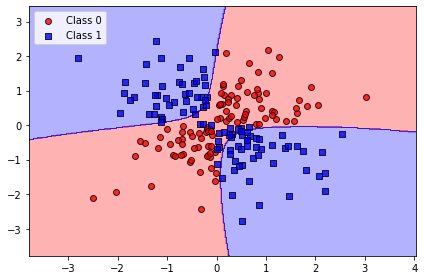

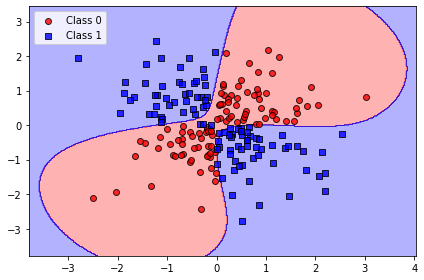

In [54]:
plot_decision_regions(X_xor, y_xor, classifier=low_gam_svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_xor, y_xor, classifier=high_gam_svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- The gamma variable can be understood as a cutoff parameter for the Gaussian sphere
    - if we increase the gamma value, we increase in the influence or reach of hte training examples, which leads to tighter and bumpier decision boundary
- High gammas will fit the training set well but will likely have high generalization errors (overfitting)

###### Apply an RBF Kernel SVM to our Iris Dataset

In [55]:
svm = SVC(kernel='rbf', random_state=1, gamma=.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.2, random_state=1)

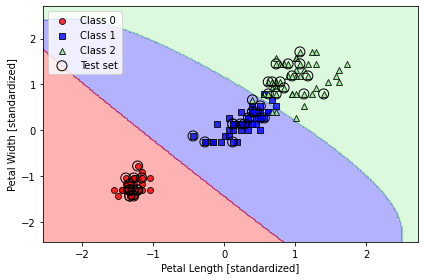

In [56]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Decision Trees

###### Impurity measure: entropy --> visualizing

In [57]:
def entropy(p): # p must be between 0-1
    return -p * np.log2(p) - (1 - p) * np.log2((1-p))

In [58]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

In [59]:
x[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [60]:
ent[:5] # returning None for the 0 so that we don't get an error --> 1 is not in the list so don't have to worry about that

[None,
 0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482]

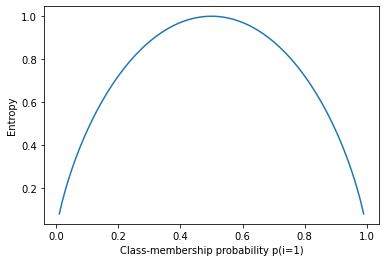

In [61]:
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

###### Comparing the 3 different impurity criteria (entropy, gini, classification error)

In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# defining functions for our impurity criteria

def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

In [64]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] # adding a scaled version of the entropy (entropy/2) to observe...
                                             #... that the Gini impurity is an intermeidate measure between entropy and CE
err = [error(i) for i in x]

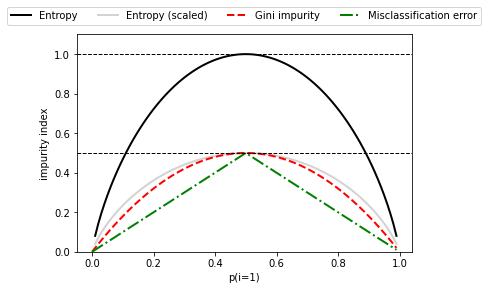

In [65]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                        ['-', '-', '--', '-.'],
                        ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i , label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

###### Building a Decision Tree

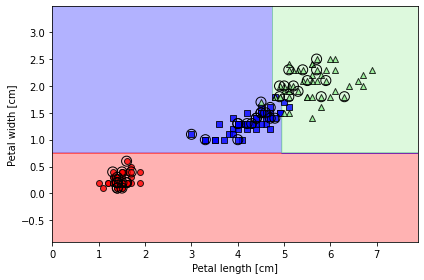

In [66]:
# Building a decision tree with a max depth of 4 and the gini impurity
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.tight_layout()
plt.show()

- ^^^ With decision trees get the axis parallel decision regions

###### Experimenting with np.vstack()

In [67]:
len(X_train)

105

In [68]:
len(X_test)

45

In [69]:
len(np.vstack((X_train, X_test)))

150

###### Done experimenting with np.vstack()

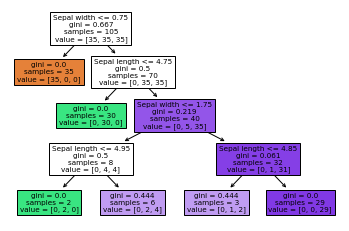

In [70]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)

plt.show()

- Gini coefficient is an impurity measure --> the 100% pure nodes in the above have a gini coefficient of zero (makes sense)
- In the 2nd depth, the right node with values = [0,35,35] has a gini coefficient of 0.5 --> makes sense, half of the values would be considered impure

###### Combing multiple decision tree via random forests

Random forest steps, summarized:
1. draw a random bootstrap sample of size 'n' (sample w/ replacement)
2. grow a decision tree from the sample. At each node:
    - randomly select 'd' features w/o replacement
    - split the node using the feature that provides the best split according to the objective function (ex: maximizing IG)
3. repeat steps 1-2 'k' times
4. aggregate prediction by each tree to assign the class label by majority vote

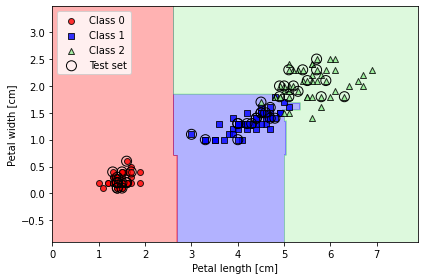

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- ^^^ trained a random forest from 25 decision trees using the 'n_estimators' parameter
- ^^^ by default uses the gini impurity measure
- ^^^ 'n_jobs' parameter allows us to parallelize our training across multiple cores --> for demonstration purposes, won't make much of a difference here

### K-nearest neighbors - a lazy learning algorithm

- a supervised algorithm
- called a "lazy" learner because it doesn't learn a discriminative function but rather memorizes the training dataset
- summary of KNN algorithm:
    - choose the # of 'k' and a distance metric
    - find the k-nearest neighbors of the data record that we want to classify
    - assign the class label by majority vote
- This is a memory based algorithm so computational intensity scales linearly with size and can become an issue with large datasets

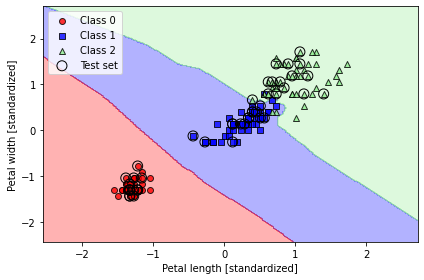

In [77]:
# implement a KNN model using the minkowski distance metric --> a generalization of the Euclidean and Manhattan distance
    # ^^^ distance becomes Euclidean when p=2 or manhattan when p=1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()